In [8]:
#Omar Naser Farahat
#120220268
#3rd Year Mechatronics

#I made the analysis by hand. It took me alot of time to get to solve the equations of the angles specifically.
#All the work was made on paper then transformed into code
#The plots are just for illustration

In [9]:
import numpy as np
import matplotlib.pyplot as plt


mechanism_data = {
    'a': {'r1': 6, 'r2': 2, 'r3': 7, 'r4': 9, 'theta2': 30,  'omega2': 10,  'alpha2': 0,   'Rpa': 6,  'delta': 30},
    'b': {'r1': 7, 'r2': 9, 'r3': 3, 'r4': 8, 'theta2': 85,  'omega2': -12, 'alpha2': 5,   'Rpa': 10, 'delta': 60},
    'c': {'r1': 3, 'r2': 10, 'r3': 6, 'r4': 8, 'theta2': 45,  'omega2': -15,  'alpha2': -10, 'Rpa': 10, 'delta': 30},
    'd': {'r1': 8, 'r2': 5, 'r3': 7, 'r4': 6, 'theta2': 25,  'omega2': 24,  'alpha2': -4,  'Rpa': 5,  'delta': 45},
    'e': {'r1': 8, 'r2': 5, 'r3': 8, 'r4': 6, 'theta2': 75,  'omega2': -50, 'alpha2': 10,   'Rpa': 9,  'delta': 300},
    'f': {'r1': 5, 'r2': 8, 'r3': 8, 'r4': 9, 'theta2': 15,  'omega2': -45, 'alpha2': 50,  'Rpa': 10, 'delta': 120},
    'g': {'r1': 6, 'r2': 8, 'r3': 8, 'r4': 9, 'theta2': 25,  'omega2': 100, 'alpha2': 18,  'Rpa': 4,  'delta': 300},
    'h': {'r1': 20, 'r2': 10, 'r3': 10, 'r4': 10, 'theta2': 50,  'omega2': -65,  'alpha2': 25,  'Rpa': 6, 'delta': 20},
    'i': {'r1': 4, 'r2': 5, 'r3': 2, 'r4': 5, 'theta2': 80,  'omega2': 25, 'alpha2': -25, 'Rpa':9, 'delta': 80},
    'j': {'r1': 20, 'r2': 10, 'r3': 5, 'r4': 10, 'theta2': 33,  'omega2': 25, 'alpha2': -40, 'Rpa': 1, 'delta': 0},
    'k': {'r1': 4, 'r2': 6, 'r3': 10, 'r4': 7, 'theta2': 88,  'omega2': -80, 'alpha2': 30, 'Rpa': 10,  'delta': 330},
    'l': {'r1': 9, 'r2': 7, 'r3': 10, 'r4': 7, 'theta2': 60,  'omega2': -90, 'alpha2': 20,  'Rpa': 5,  'delta': 180},
    'm': {'r1': 9, 'r2': 7, 'r3': 11, 'r4': 8, 'theta2': 50, 'omega2': 75,  'alpha2': -5, 'Rpa': 10, 'delta': 90},
    'n': {'r1': 9, 'r2': 7, 'r3': 11, 'r4': 6, 'theta2': 120, 'omega2': 15,  'alpha2': -65, 'Rpa': 15, 'delta': 60}
}

In [10]:
def find_angles(r1, r2, r3, r4, theta2):
    x = np.arange(-180, 180, 0.001) * np.pi / 180
    theta2_rad = theta2 * np.pi / 180

    f1 = np.arccos((r2 * np.cos(theta2_rad) + r3 * np.cos(x) - r1) / r4)
    f2 = -f1
    g1 = np.arcsin((r2 * np.sin(theta2_rad) + r3 * np.sin(x)) / r4)
    g2 = np.pi - g1

    diff1 = np.abs(f1 - g1)
    diff2 = np.abs(f1 - g2)
    diff3 = np.abs(f2 - g1)
    diff4 = np.abs(f2 - g2)

    tolerance = 0.0001
    indices1 = np.where(diff1 < tolerance)[0]
    indices2 = np.where(diff2 < tolerance)[0]
    indices3 = np.where(diff3 < tolerance)[0]
    indices4 = np.where(diff4 < tolerance)[0]

    intersections_x = np.concatenate((x[indices1], x[indices2], x[indices3], x[indices4]))
    intersections_y = np.concatenate((f1[indices1], f1[indices2], f2[indices3], f2[indices4]))

    plt.plot(x, f1, label='f1(x)')
    plt.plot(x, g1, label='g1(x)')
    plt.plot(x, f2, label='f2(x)')
    plt.plot(x, g2, label='g2(x)')
    plt.plot(intersections_x, intersections_y, 'ro', label='Intersections')
    plt.legend()
    plt.xlabel('x (radians)')
    plt.ylabel('angle (radians)')
    plt.title('Intersections of f(x) and g(x)')
    plt.grid()
    plt.show()

    index_of_separation = len(intersections_x)
    for i in range(1, len(intersections_x)):
        if intersections_x[i] - intersections_x[i - 1] > 0.1:
            index_of_separation = i
            break

    theta3 = intersections_x[(index_of_separation + len(intersections_x) - 1) // 2]
    theta4 = intersections_y[(index_of_separation + len(intersections_x) - 1) // 2]

    return theta3, theta4


In [11]:
def find_angular_velocity(r1, r2, r3, r4, theta2, omega2, theta3, theta4):
    theta2_rad = theta2 * np.pi / 180

    omega4 = ((r2 * omega2 * np.cos(theta2_rad) - (1 / np.tan(theta3)) * r2 * omega2 * np.sin(theta2_rad)) /
              (r4 * np.cos(theta4) - r4 * np.sin(theta4) * (1 / np.tan(theta3))))
    omega3 = (r4 * omega4 * np.sin(theta4) - r2 * omega2 * np.sin(theta2_rad)) / (r3 * np.sin(theta3))

    return omega3, omega4

In [12]:
def find_angular_acceleration(r1, r2, r3, r4, theta2, omega2, alpha2, theta3, theta4, omega3, omega4):
    theta2_rad = theta2 * np.pi / 180

    x = symbols('x')

    a = (r3 * omega3 ** 2 * np.cos(theta3) + r3 * x * np.sin(theta3) +
         r2 * omega2 ** 2 * np.cos(theta2_rad) + r2 * alpha2 * np.sin(theta2_rad) -
         r4 * np.cos(theta4) * omega4 ** 2) / (r4 * np.sin(theta4))

    b = (-r3 * omega3 ** 2 * np.sin(theta3) + r3 * x * np.cos(theta3) -
         r2 * omega2 ** 2 * np.sin(theta2_rad) + r2 * alpha2 * np.cos(theta2_rad) +
         r4 * np.sin(theta4) * omega4 ** 2) / (r4 * np.cos(theta4))

    equation = Eq(a, b)
    solution = solve(equation, x)

    alpha3 = solution[0]
    alpha4 = a.subs(x, alpha3)

    return alpha3, alpha4

a


<ipython-input-10-58a6398310bd>:5: RuntimeWarning: invalid value encountered in arccos
  f1 = np.arccos((r2 * np.cos(theta2_rad) + r3 * np.cos(x) - r1) / r4)


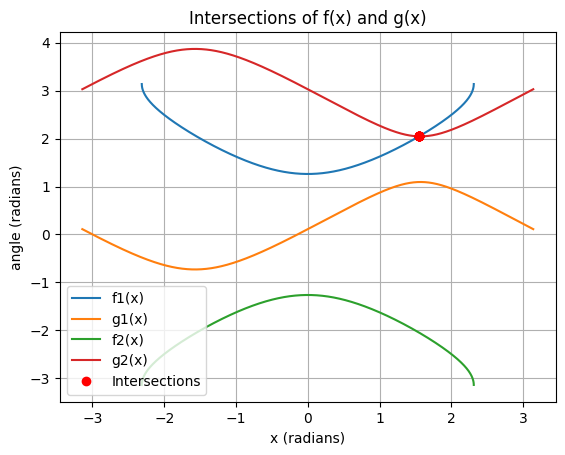

theta3: 88.84300000128371
theta4: 117.2911067134536
omega3: -5.991129598414212
omega4: -3.992069962450631
alpha3: 26.0722054113725
alpha4: 53.3258795073096
b


<ipython-input-10-58a6398310bd>:7: RuntimeWarning: invalid value encountered in arcsin
  g1 = np.arcsin((r2 * np.sin(theta2_rad) + r3 * np.sin(x)) / r4)


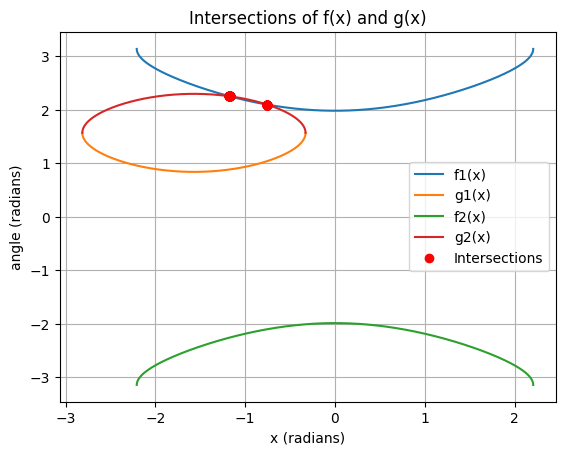

theta3: -43.231999999346954
theta4: 120.24708104455533
omega3: 73.05997638290687
omega4: -37.291470371072144
alpha3: -29826.6272977165
alpha4: 11390.5114416752
c


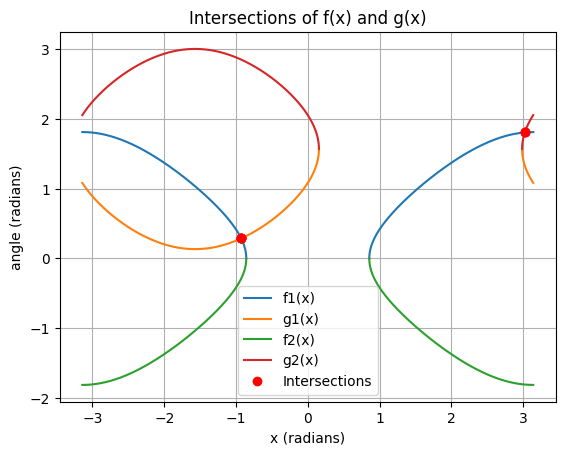

theta3: 173.27100000168684
theta4: 103.64763605720736
omega3: -22.77474296242762
omega4: -15.703071499940632
alpha3: -65.2487492914621
alpha4: -148.033651606931
d


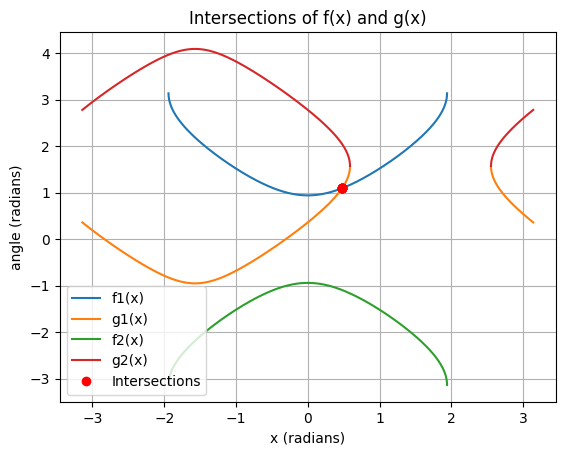

theta3: 27.405000000990327
theta4: 62.76372670957666
omega3: -18.14154516441074
omega4: -1.4502605882302582
alpha3: 1025.77117219280
alpha4: 1489.50963269785
e


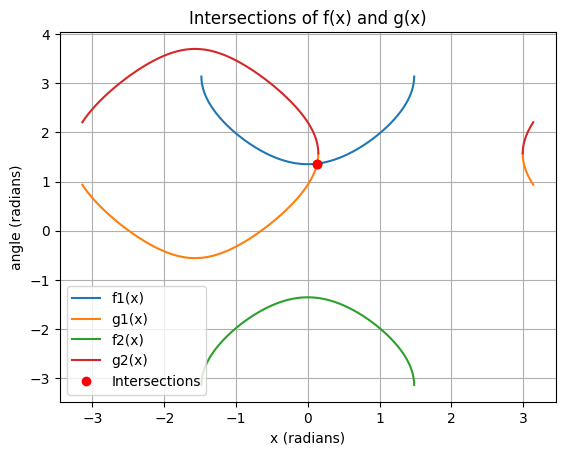

theta3: 7.498000000895274
theta4: 78.2125427854905
omega3: 1.8553665956727066
omega4: -40.784147166862326
alpha3: 331.948608983126
alpha4: 275.581707072076
f


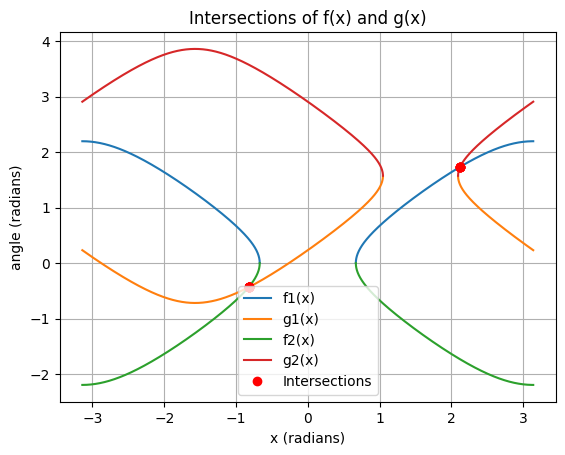

theta3: -47.26599999936621
theta4: -25.009009780835555
omega3: -76.38279054106829
omega4: -93.47492295788847
alpha3: -7516.43349998261
alpha4: -5342.38932746691
g


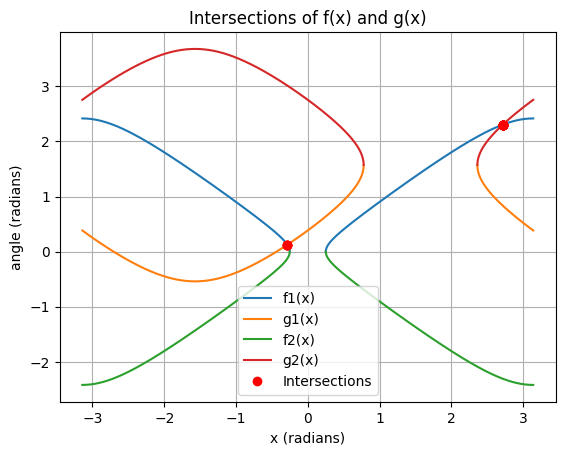

theta3: 155.720000001603
theta4: 132.16930529464688
omega3: 239.12200486652821
omega4: 168.60903920670654
alpha3: -43710.2847312577
alpha4: -47437.3862722465
h


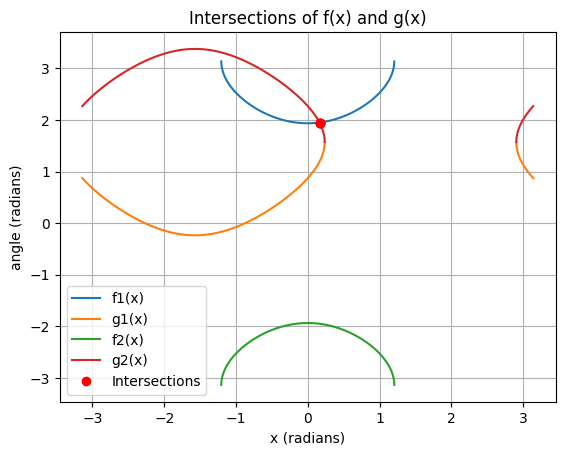

theta3: 9.369000000904208
theta4: 111.74966489984396
omega3: 58.620966947697944
omega4: -43.33478422068863
alpha3: -652.080339644577
alpha4: 7229.89734910902
i


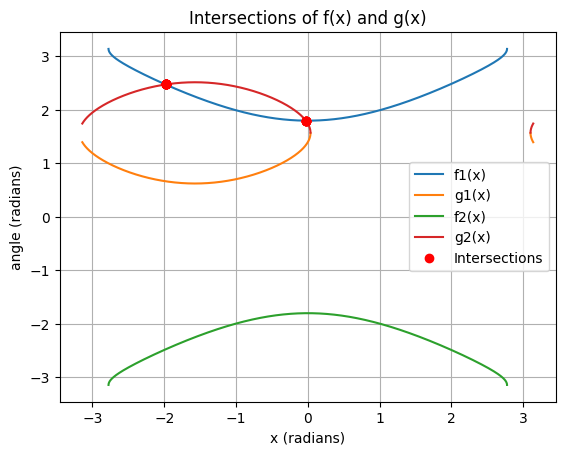

theta3: -1.5469999991479144
theta4: 103.09095901409306
omega3: -25.334299754159563
omega4: 25.55798147631402
alpha3: -344.576835245240
alpha4: 505.351880394286
j


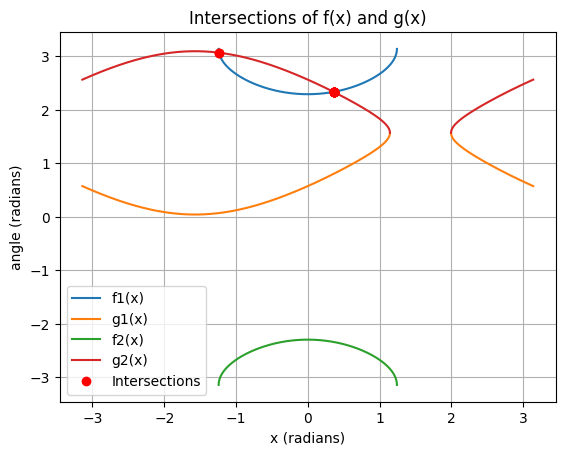

theta3: 20.608000000957873
theta4: 133.89383012162574
omega3: -53.453012675666564
omega4: 5.840735848172109
alpha3: -1475.61818073009
alpha4: 2225.20946916908
k


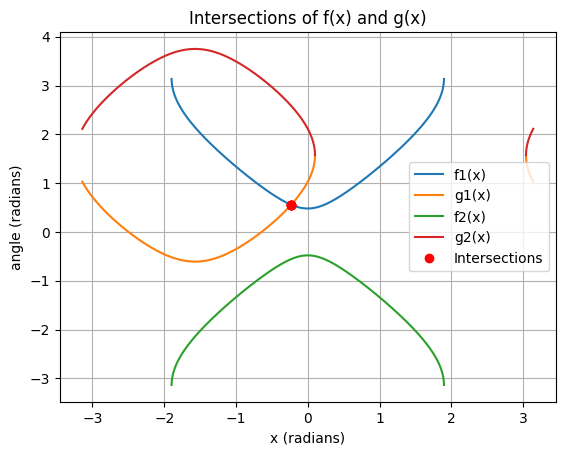

theta3: -13.272999999203904
theta4: 31.908256394348026
omega3: -56.160263017635934
omega4: -94.80426115392002
alpha3: -2694.36801409929
alpha4: -4055.46406628838
l


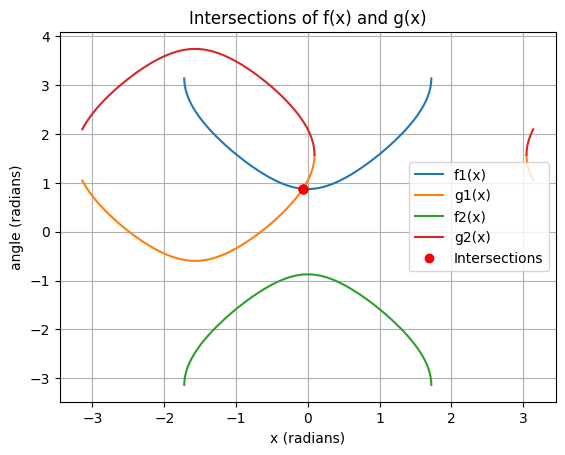

theta3: -3.9019999991591585
theta4: 50.242057322244705
omega3: -13.174247389398866
omega4: -99.72194054806634
alpha3: -1565.86336982495
alpha4: -2462.46081926614
m


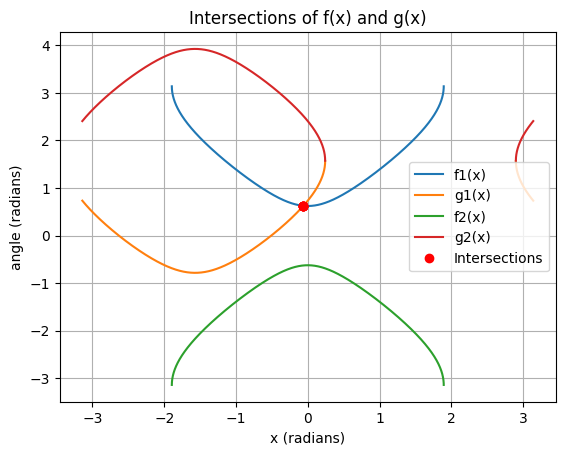

theta3: -3.487999999157182
theta4: 35.914613572583214
omega3: 18.298519098214232
omega4: 83.09353312461715
alpha3: -2034.76963228339
alpha4: -3071.70221995144
n


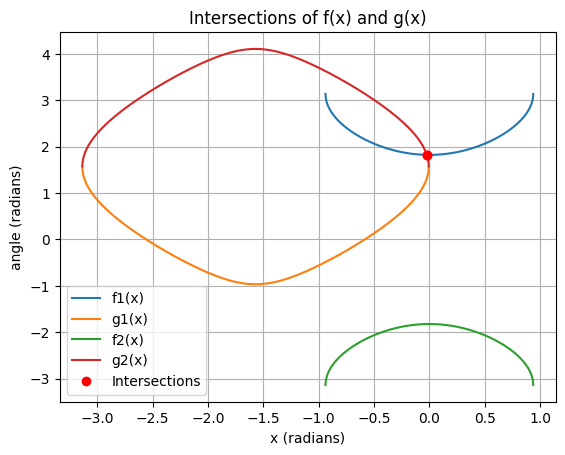

theta3: -1.3199999991468303
theta4: 104.50630340236228
omega3: 2.6503675710022714
omega4: 15.538889390513003
alpha3: -6.95419512348886
alpha4: -127.332771784898


In [13]:
for mechanism_name, mechanism_params in mechanism_data.items():
    print(mechanism_name)
    r1 = mechanism_params['r1']
    r2 = mechanism_params['r2']
    r3 = mechanism_params['r3']
    r4 = mechanism_params['r4']
    theta2 = mechanism_params['theta2']
    omega2 = mechanism_params['omega2']
    alpha2 = mechanism_params['alpha2']

    theta3, theta4 = find_angles(r1, r2, r3, r4, theta2)
    print(f"theta3: {theta3 * 180 / np.pi}")
    print(f"theta4: {theta4 * 180 / np.pi}")

    omega3, omega4 = find_angular_velocity(r1, r2, r3, r4, theta2, omega2, theta3, theta4)
    print(f"omega3: {omega3}")
    print(f"omega4: {omega4}")

    alpha3, alpha4 = find_angular_acceleration(r1, r2, r3, r4, theta2, omega2, alpha2, theta3, theta4, omega3, omega4)
    print(f"alpha3: {alpha3}")
    print(f"alpha4: {alpha4}")


a
len(intersections_x) 13


<ipython-input-14-777d2324b61f>:37: RuntimeWarning: invalid value encountered in arccos
  f1 = np.arccos((r2 * np.cos(theta2) + r3 * np.cos(x) - r1) / r4)


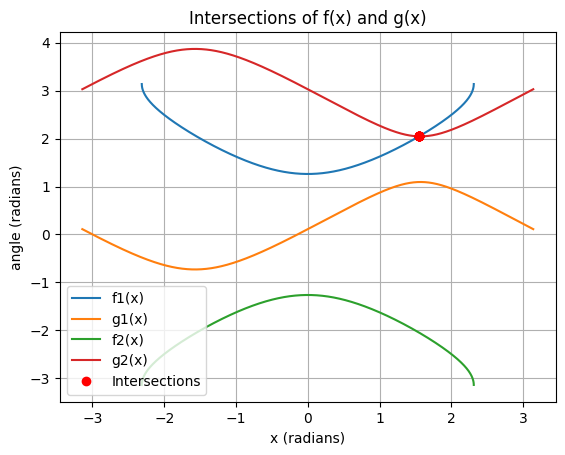

theta3: 88.84300000128371
theta4: 117.2911067134536
omega3: -5.991129598414212
omega4: -3.992069962450631
alpha3: 26.0722054113725
alpha4: 53.3258795073096
b
len(intersections_x) 100


<ipython-input-14-777d2324b61f>:39: RuntimeWarning: invalid value encountered in arcsin
  g1 = np.arcsin((r2 * np.sin(theta2) + r3 * np.sin(x)) / r4)


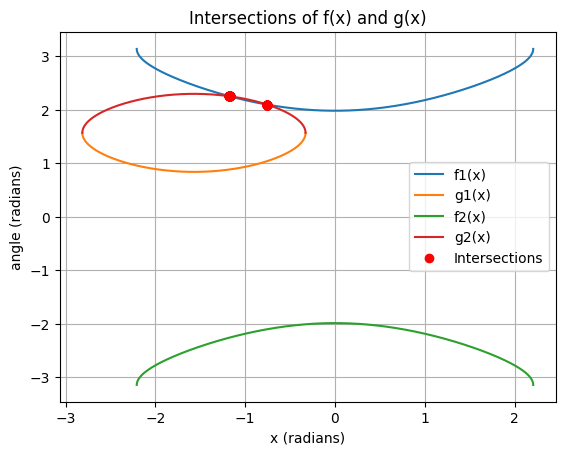

theta3: -43.231999999346954
theta4: 120.24708104455533
omega3: 73.05997638290687
omega4: -37.291470371072144
alpha3: -29826.6272977165
alpha4: 11390.5114416752
c
len(intersections_x) 8


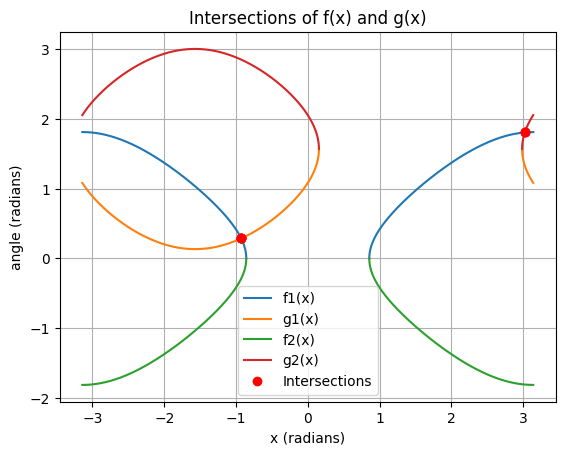

theta3: 173.27100000168684
theta4: 103.64763605720736
omega3: -22.77474296242762
omega4: -15.703071499940632
alpha3: -65.2487492914621
alpha4: -148.033651606931
d
len(intersections_x) 7


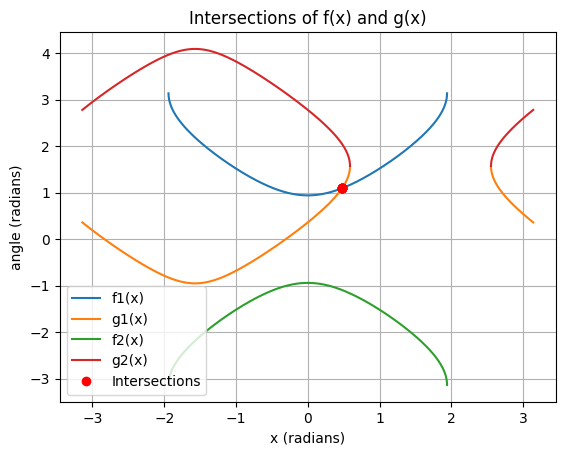

theta3: 27.405000000990327
theta4: 62.76372670957666
omega3: -18.14154516441074
omega4: -1.4502605882302582
alpha3: 1025.77117219280
alpha4: 1489.50963269785
e
len(intersections_x) 2


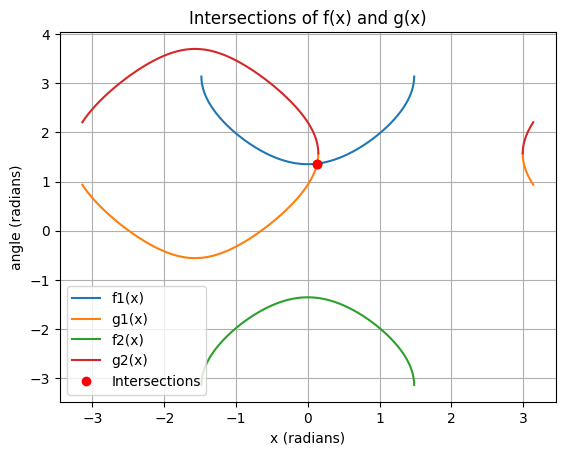

theta3: 7.498000000895274
theta4: 78.2125427854905
omega3: 1.8553665956727066
omega4: -40.784147166862326
alpha3: 331.948608983126
alpha4: 275.581707072076
f
len(intersections_x) 19


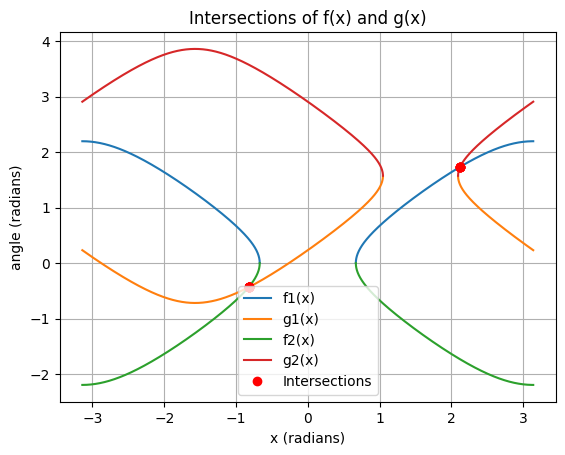

theta3: -47.26599999936621
theta4: -25.009009780835555
omega3: -76.38279054106829
omega4: -93.47492295788847
alpha3: -7516.43349998261
alpha4: -5342.38932746691
g
len(intersections_x) 20


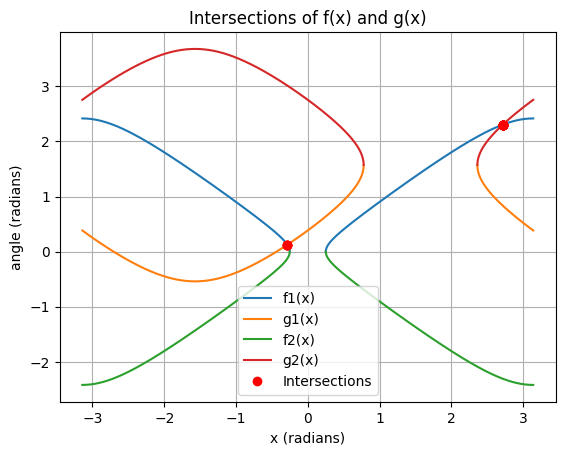

theta3: 155.720000001603
theta4: 132.16930529464688
omega3: 239.12200486652821
omega4: 168.60903920670654
alpha3: -43710.2847312577
alpha4: -47437.3862722465
h
len(intersections_x) 4


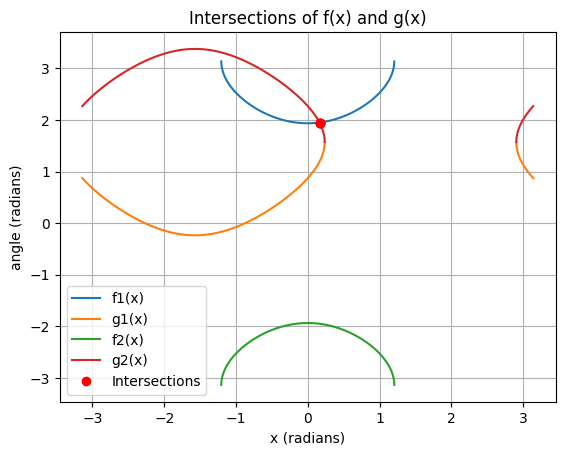

theta3: 9.369000000904208
theta4: 111.74966489984396
omega3: 58.620966947697944
omega4: -43.33478422068863
alpha3: -652.080339644577
alpha4: 7229.89734910902
i
len(intersections_x) 20


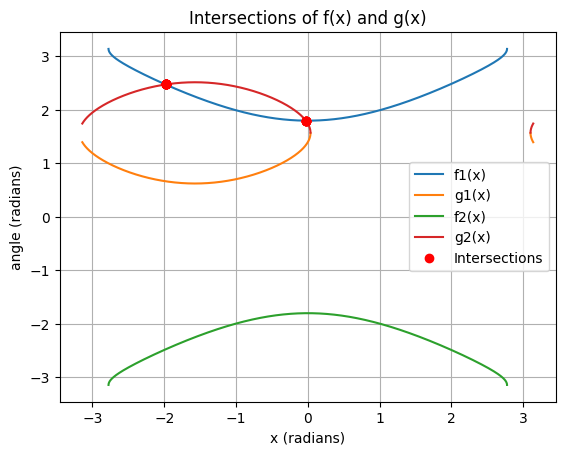

theta3: -1.5469999991479144
theta4: 103.09095901409306
omega3: -25.334299754159563
omega4: 25.55798147631402
alpha3: -344.576835245240
alpha4: 505.351880394286
j
len(intersections_x) 15


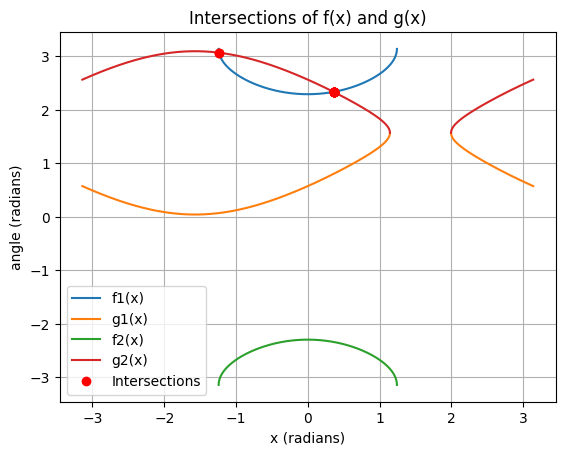

theta3: 20.608000000957873
theta4: 133.89383012162574
omega3: -53.453012675666564
omega4: 5.840735848172109
alpha3: -1475.61818073009
alpha4: 2225.20946916908
k
len(intersections_x) 5


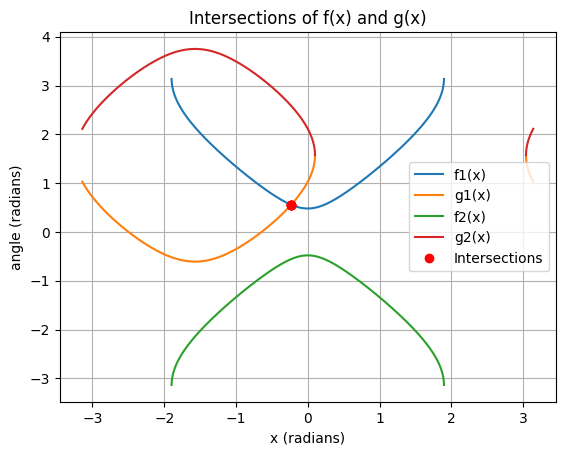

theta3: -13.272999999203904
theta4: 31.908256394348026
omega3: -56.160263017635934
omega4: -94.80426115392002
alpha3: -2694.36801409929
alpha4: -4055.46406628838
l
len(intersections_x) 5


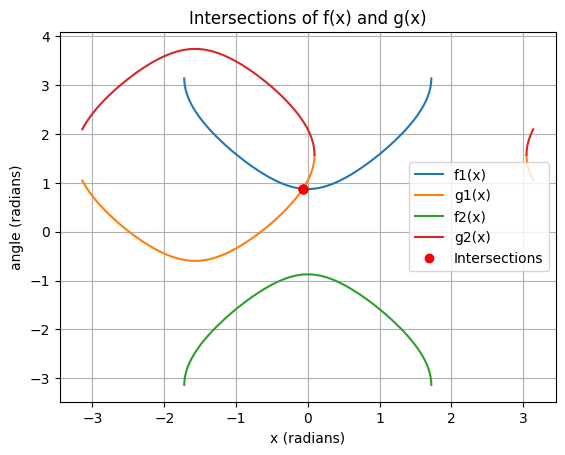

theta3: -3.9019999991591585
theta4: 50.242057322244705
omega3: -13.174247389398866
omega4: -99.72194054806634
alpha3: -1565.86336982495
alpha4: -2462.46081926614
m
len(intersections_x) 6


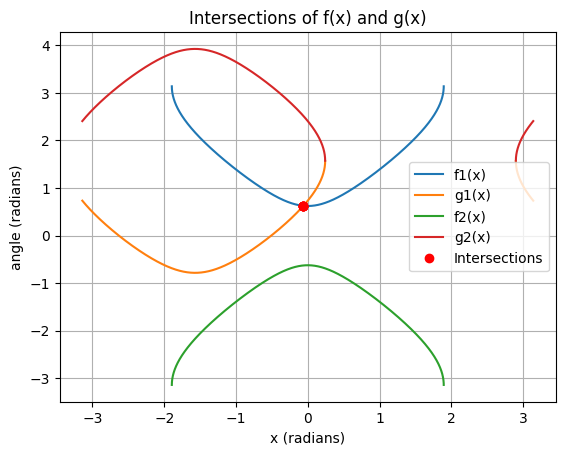

theta3: -3.487999999157182
theta4: 35.914613572583214
omega3: 18.298519098214232
omega4: 83.09353312461715
alpha3: -2034.76963228339
alpha4: -3071.70221995144
n
len(intersections_x) 2


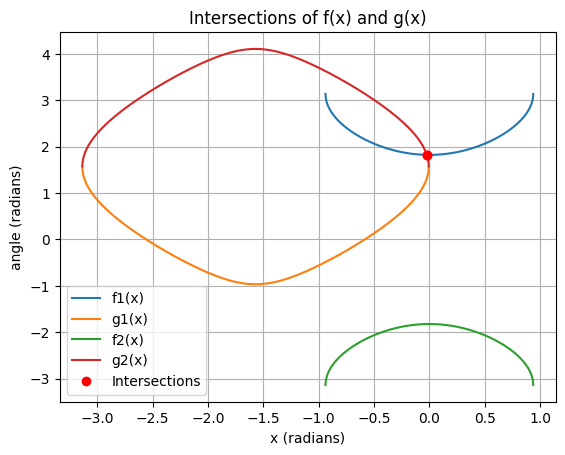

theta3: -1.3199999991468303
theta4: 104.50630340236228
omega3: 2.6503675710022714
omega4: 15.538889390513003
alpha3: -6.95419512348886
alpha4: -127.332771784898


In [14]:
#This is the code as a whole.
#It can be copied as it is and pasted in any python interpreter and it will output the results

import numpy as np
import matplotlib.pyplot as plt


mechanism_data = {
    'a': {'r1': 6, 'r2': 2, 'r3': 7, 'r4': 9, 'theta2': 30,  'omega2': 10,  'alpha2': 0,   'Rpa': 6,  'delta': 30},
    'b': {'r1': 7, 'r2': 9, 'r3': 3, 'r4': 8, 'theta2': 85,  'omega2': -12, 'alpha2': 5,   'Rpa': 10, 'delta': 60},
    'c': {'r1': 3, 'r2': 10, 'r3': 6, 'r4': 8, 'theta2': 45,  'omega2': -15,  'alpha2': -10, 'Rpa': 10, 'delta': 30},
    'd': {'r1': 8, 'r2': 5, 'r3': 7, 'r4': 6, 'theta2': 25,  'omega2': 24,  'alpha2': -4,  'Rpa': 5,  'delta': 45},
    'e': {'r1': 8, 'r2': 5, 'r3': 8, 'r4': 6, 'theta2': 75,  'omega2': -50, 'alpha2': 10,   'Rpa': 9,  'delta': 300},
    'f': {'r1': 5, 'r2': 8, 'r3': 8, 'r4': 9, 'theta2': 15,  'omega2': -45, 'alpha2': 50,  'Rpa': 10, 'delta': 120},
    'g': {'r1': 6, 'r2': 8, 'r3': 8, 'r4': 9, 'theta2': 25,  'omega2': 100, 'alpha2': 18,  'Rpa': 4,  'delta': 300},
    'h': {'r1': 20, 'r2': 10, 'r3': 10, 'r4': 10, 'theta2': 50,  'omega2': -65,  'alpha2': 25,  'Rpa': 6, 'delta': 20},
    'i': {'r1': 4, 'r2': 5, 'r3': 2, 'r4': 5, 'theta2': 80,  'omega2': 25, 'alpha2': -25, 'Rpa':9, 'delta': 80},
    'j': {'r1': 20, 'r2': 10, 'r3': 5, 'r4': 10, 'theta2': 33,  'omega2': 25, 'alpha2': -40, 'Rpa': 1, 'delta': 0},
    'k': {'r1': 4, 'r2': 6, 'r3': 10, 'r4': 7, 'theta2': 88,  'omega2': -80, 'alpha2': 30, 'Rpa': 10,  'delta': 330},
    'l': {'r1': 9, 'r2': 7, 'r3': 10, 'r4': 7, 'theta2': 60,  'omega2': -90, 'alpha2': 20,  'Rpa': 5,  'delta': 180},
    'm': {'r1': 9, 'r2': 7, 'r3': 11, 'r4': 8, 'theta2': 50, 'omega2': 75,  'alpha2': -5, 'Rpa': 10, 'delta': 90},
    'n': {'r1': 9, 'r2': 7, 'r3': 11, 'r4': 6, 'theta2': 120, 'omega2': 15,  'alpha2': -65, 'Rpa': 15, 'delta': 60}
}

for (mechanism_name, mechanism_params) in mechanism_data.items():
  print(mechanism_name)
  r1 = mechanism_params['r1']
  r2 = mechanism_params['r2']
  r3 = mechanism_params['r3']
  r4 = mechanism_params['r4']
  theta2 = mechanism_params['theta2'] * np.pi/180
  omega2 = mechanism_params['omega2']
  alpha2 = mechanism_params['alpha2']

  x = np.arange(-180, 180, 0.001) * np.pi/180
  #with np.errstate(invalid='ignore'):
  f1 = np.arccos((r2 * np.cos(theta2) + r3 * np.cos(x) - r1) / r4)
  f2 = -f1
  g1 = np.arcsin((r2 * np.sin(theta2) + r3 * np.sin(x)) / r4)
  g2 = np.pi - g1


  diff1 = np.abs(f1 - g1)
  diff2 = np.abs(f1 - g2)
  diff3 = np.abs(f2 - g1)
  diff4 = np.abs(f2 - g2)

  tolerance = 0.0001

  indices1 = np.where(diff1 < tolerance)[0]
  indices2 = np.where(diff2 < tolerance)[0]
  indices3 = np.where(diff3 < tolerance)[0]
  indices4 = np.where(diff4 < tolerance)[0]




  intersections_x = np.concatenate((x[indices1], x[indices2], x[indices3], x[indices4]))
  intersections_y = np.concatenate((f1[indices1], f1[indices2], f2[indices3], f2[indices4]))

  print ("len(intersections_x)", len(intersections_x))


  plt.plot(x, f1, label='f1(x)')
  plt.plot(x, g1, label='g1(x)')
  plt.plot(x, f2, label='f2(x)')
  plt.plot(x, g2, label='g2(x)')
  plt.plot(intersections_x, intersections_y, 'ro', label='Intersections')
  plt.legend()
  plt.xlabel('x (radians)')
  plt.ylabel('angle (radians)')
  plt.title('Intersections of f(x) and g(x)')
  plt.grid()
  plt.show()

  #print(len(intersections_x))
  #print(intersections_x)
  #print(intersections_y)
  index_of_separation = len(intersections_x)

  for i in range (1, len(intersections_x)):
    if intersections_x[i] - intersections_x[i-1] > 0.1:
      index_of_separation = i
      break

  theta3 = intersections_x[(index_of_separation + len(intersections_x) - 1) // 2]
  theta4 = intersections_y[(index_of_separation + len(intersections_x) -1) // 2]

  print(f"theta3: {theta3 * 180 /np.pi}")
  print(f"theta4: {theta4 * 180 / np.pi}")

  omega4 = ((r2 * omega2 *np.cos(theta2) - (1/np.tan(theta3)) * r2 * omega2 * np.sin(theta2)) / (r4*np.cos(theta4) - r4 * np.sin(theta4) * (1/np.tan(theta3))))
  omega3 = (r4 * omega4 * np.sin(theta4) - r2* omega2* np.sin(theta2))  / (r3 * np.sin(theta3))

  print (f"omega3: {omega3}")
  print (f"omega4: {omega4}")


  from sympy import symbols, Eq, solve

  x = symbols('x')

  a = (r3 * omega3 ** 2 * np.cos(theta3) + r3 * x * np.sin(theta3) + r2 * omega2 ** 2 * np.cos(theta2) + r2 * alpha2 * np.sin(theta2) - r4 * np.cos(theta4) * omega4 ** 2) / (r4 * np.sin(theta4))
  b = (-r3 * omega3 ** 2 * np.sin(theta3) + r3 * x * np.cos(theta3) - r2 * omega2 ** 2 * np.sin(theta2) + r2 * alpha2 * np.cos(theta2) + r4 * np.sin(theta4) * omega4 ** 2) / (r4 * np.cos(theta4))

  equation = Eq(a, b)
  solution = solve(equation, x)

  alpha3 = solution[0]
  alpha4 = a.subs(x, alpha3)
  print(f"alpha3: {alpha3}")
  print(f"alpha4: {alpha4}")
